# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 2-13 rely on your question 1 answer.

In [1]:
import pandas as pd
import numpy as np
import re

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
# import warnings
# warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [44]:
Energy = pd.read_excel(r"D:/Introduction-to-Data-Science-in-Python/assignment3/assets/Energy Indicators.xls", skipfooter = 38,
                      skiprows = 16)

In [45]:
Energy.shape

(228, 6)

In [46]:
Energy.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Energy Supply',
       'Energy Supply per capita', 'Renewable Electricity Production'],
      dtype='object')

### ***Unnamed: 2, 	Energy Supply, 	Energy Supply per capita, 	Renewable Electricity Production***
### ***NaN, 	Petajoules, 	Gigajoules, 	%***

In [47]:
new_names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

Energy = Energy.drop(["Unnamed: 0", "Unnamed: 1"], axis = 1).drop(0, axis = 0) \
                .rename({prev_name: new_name for (prev_name, new_name) in zip(Energy.columns[2:], new_names)}, axis = 1)

In [48]:
Energy["Energy Supply"] = Energy.loc[:, "Energy Supply"].apply(lambda value: value *  1_000_000 if value != "..." else np.nan)

In [49]:
Energy.isna().apply(np.sum)

Country                     0
Energy Supply               5
Energy Supply per Capita    0
% Renewable                 0
dtype: int64

In [50]:
rename_dict = {"Republic of Korea": "South Korea", "United States of America": "United States",
               "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
               "China, Hong Kong Special Administrative Region": "Hong Kong"}

Energy.Country = Energy.Country.apply(lambda country: rename_dict.get(country) if country in rename_dict.keys() else country)

In [51]:
Energy.Country.isin(rename_dict.keys()).sum()

0

In [52]:
[cname for cname in Energy.Country if "(" in cname]

['Bolivia (Plurinational State of)',
 'Falkland Islands (Malvinas)',
 'Iran (Islamic Republic of)',
 'Micronesia (Federated States of)',
 'Sint Maarten (Dutch part)',
 'Venezuela (Bolivarian Republic of)']

In [53]:
_remove = re.compile("\s[\(][\w\s]+[\)]")

In [54]:
[re.split(_remove, cname)[0] for cname in Energy.Country if "(" in cname]

['Bolivia',
 'Falkland Islands',
 'Iran',
 'Micronesia',
 'Sint Maarten',
 'Venezuela']

In [55]:
Energy.Country = Energy.Country.apply(lambda cname: re.split(_remove, cname)[0] if "(" in cname else cname)

In [56]:
sum(["(" in cname for cname in Energy.Country])

0

In [57]:
Energy.shape

(227, 4)

In [58]:
Energy.Country

1                    Afghanistan
2                        Albania
3                        Algeria
4                 American Samoa
5                        Andorra
                 ...            
223                     Viet Nam
224    Wallis and Futuna Islands
225                        Yemen
226                       Zambia
227                     Zimbabwe
Name: Country, Length: 227, dtype: object

In [68]:
Energy.loc[:, ["Country", "Energy Supply", "Energy Supply per Capita"]].iloc[40:60, :]

,Country,Energy Supply,Energy Supply per Capita
41,Chad,7.700000e+07,6
42,Chile,1.613000e+09,92
43,China2,1.271910e+11,93
44,"China, Hong Kong Special Administrative Region3",5.850000e+08,82
45,"China, Macao Special Administrative Region4",4.700000e+07,83
46,Colombia,1.513000e+09,32
47,Comoros,5.000000e+06,7
48,Congo,1.020000e+08,23
49,Cook Islands,1.000000e+06,48
50,Costa Rica,2.220000e+08,47


In [29]:
GDP = pd.read_csv(r"D:/Introduction-to-Data-Science-in-Python/assignment3/assets/world_bank.csv", skiprows = 4)

In [79]:
GDP.shape

(264, 60)

In [82]:
GDP.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN


In [85]:
rename_dict = {"Korea, Rep.": "South Korea",  "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}

GDP.loc[:, "Country Name"] = GDP.loc[:, "Country Name"].apply(lambda cname: rename_dict.get(cname) if cname in rename_dict.keys() else cname)

In [125]:
GDP.loc[:, list(GDP.columns[0:3]) + list(GDP.columns[-10:])].head(3)

,Country,Country Code,Indicator Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10


In [87]:
GDP.tail(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
261,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.508024e+10,1.344383e+10,1.629401e+10,1.714358e+10,1.672524e+10,1.689205e+10,...,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
262,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.592975e+09,4.655503e+09,4.539542e+09,4.688093e+09,5.260699e+09,6.136472e+09,...,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10
263,Zimbabwe,ZWE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,3.338344e+09,3.549199e+09,3.600111e+09,3.824915e+09,3.782605e+09,3.968352e+09,...,1.006276e+10,9.695130e+09,7.982103e+09,8.459783e+09,9.422161e+09,1.054391e+10,1.165789e+10,1.218064e+10,1.264939e+10,1.278517e+10


In [114]:
ScimEn = pd.read_excel(r"D:/Introduction-to-Data-Science-in-Python/assignment3/assets/scimagojr-3.xlsx")
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [118]:
GDP.rename({"Country Name": "Country"}, axis = 1, inplace = True)

In [129]:
set(GDP.Country).intersection(set(ScimEn.Country[:15])).intersection(set(Energy.Country))

{'Brazil',
 'Canada',
 'Germany',
 'India',
 'Iran',
 'Russian Federation',
 'South Korea'}

In [124]:
# GDP.loc[:, list(GDP.columns[0:3]) + list(GDP.columns[-10:])]
pd.merge(pd.merge(ScimEn.iloc[:15, :], Energy, on = "Country", how = "inner"),
         GDP.loc[:, list(GDP.columns[0:3]) + list(GDP.columns[-10:])],
         on = "Country", how = "inner")

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,5,Russian Federation,18534,18301,34266,12422,1.85,57,3.070900e+10,214,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
1,6,Canada,17899,17620,215003,40930,12.01,149,1.043100e+10,296,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
2,7,Germany,17027,16831,140566,27426,8.26,126,1.326100e+10,165,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
3,8,India,15005,14841,128763,37209,8.58,115,3.319500e+10,26,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
4,10,South Korea,11983,11923,114675,22595,9.57,104,1.100700e+10,221,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12
5,13,Iran,8896,8819,57470,19125,6.46,72,9.172000e+09,119,...,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
6,15,Brazil,8668,8596,60702,14396,7.00,86,1.214900e+10,59,...,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12


In [2]:
def answer_one() -> pd.DataFrame:
    
    
    ##############################
    ####   Energy DataFrame   ####
    ##############################
    
    # read in Energy 
    Energy = pd.read_excel(r"D:/Introduction-to-Data-Science-in-Python/assignment3/assets/Energy Indicators.xls",
                           skipfooter = 38, skiprows = 16)
    # rename the columns
    new_names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy = Energy.drop(["Unnamed: 0", "Unnamed: 1"], axis = 1).drop(0, axis = 0) \
                .rename({prev_name: new_name for (prev_name, new_name) in zip(Energy.columns[2:], new_names)}, axis = 1)
    
    # convert PetaJoules to GigaJoules
    # and replace ellipsis with np.nan
    Energy["Energy Supply"] = Energy.loc[:, "Energy Supply"].apply(lambda value: value *  1_000_000 if value != "..." else np.nan)
    
    # rename the countries
    rename_dict = {"Republic of Korea": "South Korea", "United States of America": "United States",
               "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
               "China, Hong Kong Special Administrative Region": "Hong Kong"}
    Energy.Country = Energy.Country.apply(lambda country: rename_dict.get(country) if country in rename_dict.keys() else country)
    
    # strip country names with parentheses
    _remove = re.compile("\s[\(][\w\s]+[\)]")
    Energy.Country = Energy.Country.apply(lambda cname: re.split(_remove, cname)[0] if "(" in cname else cname)
    Energy.Country = Energy.Country.str.strip()
    
    
    ##############################
    #####   GDP DataFrame   ######
    ##############################
    
    # read in GDP
    GDP = pd.read_csv(r"D:/Introduction-to-Data-Science-in-Python/assignment3/assets/world_bank.csv", skiprows = 4)
    
    # renaming countries 
    rename_dict = {"Korea, Rep.": "South Korea",  "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}
    GDP.loc[:, "Country Name"] = GDP.loc[:, "Country Name"].apply(lambda cname: rename_dict.get(cname) if cname in rename_dict.keys() else cname)
    GDP.loc[:, "Country Name"] = GDP.loc[:, "Country Name"].str.strip()
    
    # rename the country name column
    GDP.rename({"Country Name": "Country"}, axis = 1, inplace = True)
    
    
    ##############################
    #####   ScimEn DataFrame #####
    ##############################
    
    ScimEn = pd.read_excel(r"D:/Introduction-to-Data-Science-in-Python/assignment3/assets/scimagojr-3.xlsx")
    
    # merge GDP & Energy
    result = pd.merge(GDP, Energy, left_on = "Country", right_on = "Country", how = "outer")
    
    # merge the result with ScimEn
    result = pd.merge(result, ScimEn, left_on = "Country", right_on = "Country", how = "inner")
    
    selected_cols = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document',
                     'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009',
                     '2010', '2011', '2012', '2013', '2014', '2015']
    
    # set Country as index
    result.set_index("Country", inplace = True)
    
    # sort the DataFrame by Rank
    result = result.sort_values("Rank")
    
    # pick only the specified columns
    result = result.loc[:, selected_cols]
    
    return result.query("Rank <= 15")

In [3]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,NaN,NaN,NaN,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,NaN,NaN,NaN,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,NaN,NaN,NaN,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,NaN,NaN,NaN,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.94543,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.90153,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.96908,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,NaN,NaN,NaN,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [95]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [ ]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [2]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [6]:
def answer_two() -> int:
    
    
    ##############################
    ####   Energy DataFrame   ####
    ##############################
    
    # read in Energy 
    Energy = pd.read_excel(r"D:/Introduction-to-Data-Science-in-Python/assignment3/assets/Energy Indicators.xls",
                           skipfooter = 38, skiprows = 16)
    # rename the columns
    new_names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy = Energy.drop(["Unnamed: 0", "Unnamed: 1"], axis = 1).drop(0, axis = 0) \
                .rename({prev_name: new_name for (prev_name, new_name) in zip(Energy.columns[2:], new_names)}, axis = 1)
    
    # convert PetaJoules to GigaJoules
    # and replace ellipsis with np.nan
    Energy["Energy Supply"] = Energy.loc[:, "Energy Supply"].apply(lambda value: value *  1_000_000 if value != "..." else np.nan)
    
    # rename the countries
    rename_dict = {"Republic of Korea": "South Korea", "United States of America": "United States",
               "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
               "China, Hong Kong Special Administrative Region": "Hong Kong"}
    Energy.Country = Energy.Country.apply(lambda country: rename_dict.get(country) if country in rename_dict.keys() else country)
    
    # strip country names with parentheses
    _remove = re.compile("\s[\(][\w\s]+[\)]")
    Energy.Country = Energy.Country.apply(lambda cname: re.split(_remove, cname)[0] if "(" in cname else cname)
    Energy.Country = Energy.Country.str.strip()
    
    
    ##############################
    #####   GDP DataFrame   ######
    ##############################
    
    # read in GDP
    GDP = pd.read_csv(r"D:/Introduction-to-Data-Science-in-Python/assignment3/assets/world_bank.csv", skiprows = 4)
    
    # renaming countries 
    rename_dict = {"Korea, Rep.": "South Korea",  "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}
    GDP.loc[:, "Country Name"] = GDP.loc[:, "Country Name"].apply(lambda cname: rename_dict.get(cname) if cname in rename_dict.keys() else cname)
    GDP.loc[:, "Country Name"] = GDP.loc[:, "Country Name"].str.strip()
    
    # rename the country name column
    GDP.rename({"Country Name": "Country"}, axis = 1, inplace = True)
    
    
    ##############################
    #####   ScimEn DataFrame #####
    ##############################
    
    ScimEn = pd.read_excel(r"D:/Introduction-to-Data-Science-in-Python/assignment3/assets/scimagojr-3.xlsx")
    
    # columns to pick
    selected_cols = ["Country", "Rank"]
    
    # merge by inner join
    inner_merge = pd.merge(pd.merge(GDP, Energy, left_on = "Country", right_on = "Country", how = "inner"),
                      ScimEn, left_on = "Country", right_on = "Country", how = "inner")
    inner_merge = inner_merge.loc[:, selected_cols]
    
    # merge by outer join
    outer_merge = pd.merge(pd.merge(GDP, Energy, left_on = "Country", right_on = "Country", how = "outer"),
                      ScimEn, left_on = "Country", right_on = "Country", how = "outer")
    outer_merge = outer_merge.loc[:, selected_cols]
    
    # lost records
    n_lost_records = outer_merge.shape[0] - inner_merge.shape[0]
    
    return n_lost_records

In [7]:
answer_two()

196

In [8]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [84]:
pd.Series(answer_one().loc[:, ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']] \
                              .apply(np.mean, axis = 1).sort_values(ascending = False),
                     name = "avgGDP")

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [13]:
def answer_three() -> pd.Series:
    
    # pick just the columns needed to compute the average
    data = answer_one().loc[:, ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    
    # find the row means & sort values in descending order
    series = data.apply(np.mean, axis = 1).sort_values(ascending = False)
    
    return pd.Series(series, name = "avgGDP", index = series.index)

In [14]:
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [90]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [103]:
answer_three().index[5]

'United Kingdom'

In [104]:
answer_one().loc[answer_three().index[5], ["2006", "2015"]]

2006     2419630700401.72998
2015    2666333396477.129883
Name: United Kingdom, dtype: object

In [17]:
def answer_four() -> float:
    
    # the country with 6th largest average GDP is U.K
    sixth_largest_gdp_country = answer_three().index[5]
    
    # get the GDP values of U.K for 2006 & 2015
    data = answer_one().loc[sixth_largest_gdp_country, ["2006", "2015"]]
    
    # return the difference between GDP of 2015 & that of 2006
    return data[1] - data[0]

In [18]:
answer_four()

246702696075.3999

In [ ]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [111]:
answer_one().loc[:, "Energy Supply per Capita"].mean()

157.14285714285714

In [19]:
def answer_five() -> float:
    
    # extract the column of interest & return its mean
    return answer_one().loc[:, "Energy Supply per Capita"].mean()

In [20]:
answer_five()

157.14285714285714

In [ ]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [23]:
def answer_six() -> tuple[str, float]:
    
    # extract the interested column
    data = answer_one().loc[:, "% Renewable"]
    
    # get the max percent
    _max = data.max()
    
    # get the numeric index of the max
    _max_numeric_ind = np.nanargmax(data)
    
    # return the tuple
    return data.index[_max_numeric_ind], _max

In [24]:
answer_six()

('Brazil', 69.64803)

In [25]:
answer_one().loc[:, "% Renewable"].max()

69.64803

In [26]:
answer_one().index[np.nanargmax(answer_one().loc[:, "% Renewable"])]

'Brazil'

In [27]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [145]:
data = answer_one().loc[:, ["Citations", "Self-citations"]]
_ratio = data.loc[:, "Self-citations"] / data.Citations
_ratio.index[np.nanargmax(_ratio)], _ratio.max()

('China', 0.6893126179389422)

In [144]:
_ratio

Country
China                 0.689313
United States         0.335031
Japan                 0.275997
United Kingdom        0.183773
Russian Federation    0.362517
Canada                0.190369
Germany               0.195111
India                 0.288973
France                0.218943
South Korea           0.197035
Italy                 0.238364
Spain                 0.194299
Iran                  0.332782
Australia             0.171939
Brazil                0.237159
dtype: float64

In [28]:
def answer_seven() -> tuple[str, float]:
    
    # pick just the needed columns
    data = answer_one().loc[:, ["Citations", "Self-citations"]]
    
    # compute the Self citations / Total citations ratio
    citation_ratio = data.loc[:, "Self-citations"] / data.loc[:, "Citations"]
    
    # numeric index of the max ratio
    numeric_ind_max = np.nanargmax(citation_ratio)
    
    # return the tuple
    return citation_ratio.index[numeric_ind_max], citation_ratio.max()

In [29]:
answer_seven()

('China', 0.6893126179389422)

In [30]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [37]:
answer_one().loc[:, ["Energy Supply", "Energy Supply per Capita"]]

,Energy Supply,Energy Supply per Capita
Country,,
China,NaN,NaN
United States,NaN,NaN
Japan,NaN,NaN
United Kingdom,NaN,NaN
Russian Federation,3.070900e+10,214
Canada,1.043100e+10,296
Germany,1.326100e+10,165
India,3.319500e+10,26
France,NaN,NaN


In [71]:
def answer_eight() -> str:
    
    # get the data & pick the columns
    data = answer_one().loc[:, ["Energy Supply", "Energy Supply per Capita"]]
    
    # per capita - per head or per person
    # so, population = total energy supply / energy supply per capita
    
    # compute the populations
    populations = data.loc[:, "Energy Supply"] / data.loc[:, "Energy Supply per Capita"]
    
    # find the third most populous country
    populations = populations.sort_values(ascending = False)
    #print(populations)
    country = populations.index[2]
    
    return country

In [72]:
answer_eight()

'Russian Federation'

In [73]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [126]:
def answer_nine() -> int:
    
    # get the data & pick the columns
    data = answer_one().loc[:, ["Energy Supply", "Energy Supply per Capita", "Citable documents"]]
    
    # per capita - per head or per person
    # so, population = total energy supply / energy supply per capita
    
    # compute the populations
    data.loc[:, "Population"] = np.array(data.loc[:, "Energy Supply"] / data.loc[:, "Energy Supply per Capita"], dtype = np.float64)
    
    # number of citable docs per person
    data["Citable docs per Capita"] = np.array(data.loc[:, "Citable documents"] / data.loc[:, "Population"], dtype = np.float64)
    
    # make this a numeric column
    data["Energy Supply per Capita"] = np.array(data.loc[:, "Energy Supply per Capita"], dtype = np.float64)
    
    # print(data.dtypes)
    # correlation matrix
    corr_matrix = data.loc[:, ["Citable docs per Capita", "Energy Supply per Capita"]].corr(numeric_only = False, method = "pearson")
    
    _corr = corr_matrix.iloc[0, 1]
    return _corr

In [127]:
answer_nine()

0.8884213642341791

In [128]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

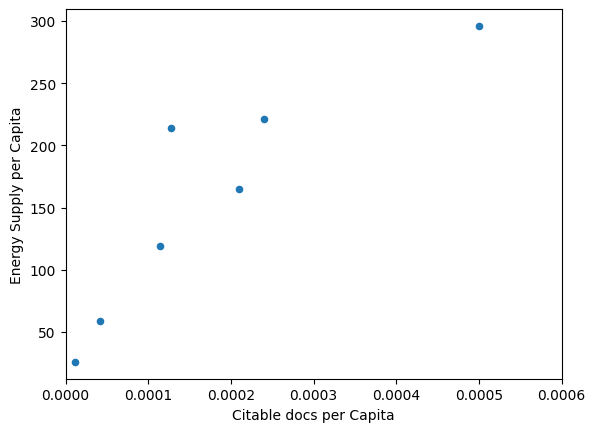

In [129]:
plot9()

In [ ]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [130]:
def answer_ten():
    
    # get the data & select the needed columns
    data = answer_one().loc[:, ["% Renewable", "Rank"]].sort_values("Rank", ascending = True)
    
    # print(data)
    # get the median percent renewable
    median_percent = answer_one().loc[:, "% Renewable"].median()
    
    # create & populate a series appropriately
    result = pd.Series(data.loc[:, "% Renewable"].apply(lambda pcnt: 1 if pcnt >= median_percent else 0), name = "HighRenew")
    
    return result

In [131]:
answer_ten()

Country
China                 0
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 0
Spain                 0
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

In [132]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [155]:
def answer_eleven() -> pd.DataFrame:
    
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    
    # get the data & pick the columns
    data = answer_one().loc[:, ["Energy Supply", "Energy Supply per Capita"]]
    data.astype({"Energy Supply": np.float64, "Energy Supply per Capita": np.float64})
    
    # per capita - per head or per person
    # so, population = total energy supply / energy supply per capita
    
    # compute the populations
    data["Population"] = np.array(data.loc[:, "Energy Supply"] / data.loc[:, "Energy Supply per Capita"], dtype = np.float64)
    
    # introduce a Continent column
    # print(data)
    # data["Continent"] = data.index.apply(lambda country: ContinentDict.get(country))
        
    results = list()
    
    # group by a function, since the index is countries
    for continet, data_frame in data.groupby(lambda idx: ContinentDict.get(idx)):
        results.append(
            {"Continent": continet,
             "Summary":
                {
                "size": len(data_frame.loc[:, "Population"]),
                "sum": data_frame.loc[:, "Population"].sum(),
                "mean": data_frame.loc[:, "Population"].mean(),
                "std": data_frame.loc[:, "Population"].std()
                }
            }
        )
        
    return pd.DataFrame([record.get("Summary") for record in results],
             index = pd.Series([record.get("Continent") for record in results], name = "Continent"))

In [154]:
ans

,size,sum,mean,std
Continent,,,,
Asia,5,1.403612e+09,4.678706e+08,7.006261e+08
Australia,1,0.000000e+00,NaN,NaN
Europe,6,2.238697e+08,1.119348e+08,4.463987e+07
North America,2,3.523986e+07,3.523986e+07,NaN
South America,1,2.059153e+08,2.059153e+08,NaN


In [ ]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [ ]:
def answer_twelve():
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 25, "Q12: Wrong result numbers!"


### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [ ]:
def answer_thirteen():
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [81]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


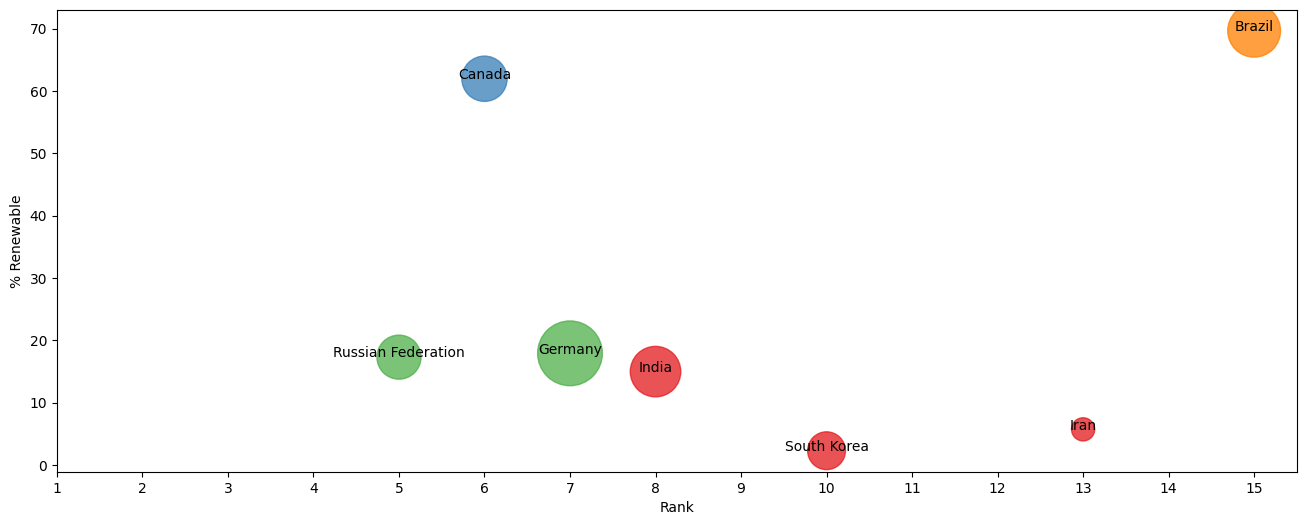

In [82]:
plot_optional()